# Quora Question Similarity 

### Data Source : https://www.kaggle.com/c/quora-question-pairs/data

#### Objective : 
 
#### Data fields :  
id - the id of a training set question pair
<br> qid1, qid2 - unique ids of each question (only available in train.csv)
<br> question1, question2 - the full text of each question
<br> is_duplicate - the target variable, set to 1 if question1 and question2 have essentially the same meaning, and 0 otherwise.

#### Performance Metric:

log - loss (because we want a probably value whether the two questions are similar or not, and not just the answer 1 or 0)
<br> Binary Confusion Matrix (It gives us precision , recall , TPR , TNR , FPR , FNR which will be useful)


### Train and Test Data :
We will randomly split it. 





## EDA

In [ ]:
#Importing Libraries 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
from subprocess import check_output 
%matplotlib inline 
import plotly.offline as py 
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go 
import plotly.tools as tls 
import os 
import gc

import re 
from nltk.corpus import stopwords
import distance 
from nltk.stem import PorterStemmer
from bs4 import BeautifulSoup



In [5]:
df = pd.read_csv("train.csv")
df.shape[0]

404290

In [6]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [7]:
df.shape

(404290, 6)

In [8]:
df.info()

#Here question 1 has one null values 
# question 2 has two null values 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
id              404290 non-null int64
qid1            404290 non-null int64
qid2            404290 non-null int64
question1       404289 non-null object
question2       404288 non-null object
is_duplicate    404290 non-null int64
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


## Find more about our output label. 

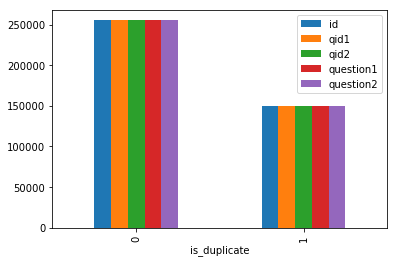

In [15]:
df.groupby("is_duplicate").count().plot.bar()

## More datapoints in Class '0' than Class '1'

In [42]:
## So percentage wise: 

print("total length : {}".format(len(df)))

print("Question Pairs that are not similar i.e [is_duplicate == 0] are {}%".format(round(( len(df.loc[df['is_duplicate'] == 0]) / len(df)) * 100,2)))

print("Question Pairs that are similar i.e [is_duplicate == 1] are {}%".format(round(( len(df.loc[df['is_duplicate'] != 0]) / len(df)) * 100,2)))



total length : 404290
Question Pairs that are not similar i.e [is_duplicate == 0] are 63.08%
Question Pairs that are similar i.e [is_duplicate == 1] are 36.92%
